Money Management System: Portfolio Optimization Approaches or How to Become a Millionaire from stock tradings
================================================================

$$\\[2pt]$$


Igor Marfin **[Unister Gmb@2014]** < <igor.marfin@unister.de>>


$$\\[40pt]$$

#Table of Contents
* &nbsp;
	* [0.1 Abstract](#0.1-Abstract)
	* [0.2 Initialization](#0.2-Initialization)
	* [0.3 Introduction to the topic](#0.3-Introduction-to-the-topic)
	* [0.4 Mean variance optimization](#0.4-Mean-variance-optimization)
		* [0.4.1 How does the **MPT**  treat the loss function and, as a result, risk?](#0.4.1-How-does-the-**MPT**--treat-the-loss-function-and,-as-a-result,-risk?)
		* [0.4.2 Get and Clean data from Yahoo! Finance](#0.4.2-Get-and-Clean-data-from-Yahoo!-Finance)
		* [0.4.3 Trade-off between Mean-variance  and Returns](#0.4.3-Trade-off-between-Mean-variance--and-Returns)
	* [0.5 Portfolio mean-variance calculation and optimization](#0.5-Portfolio-mean-variance-calculation-and-optimization)
	* [0.6 Black-Litterman model](#0.6-Black-Litterman-model)
		* [0.6.1 Reverse optimization of equilibrium returns](#0.6.1-Reverse-optimization-of-equilibrium-returns)
		* [0.6.2 Forward optimization of equilibrium returns without application of investor views](#0.6.2-Forward-optimization-of-equilibrium-returns-without-application-of-investor-views)
		* [0.6.3 Forward optimization of equilibrium returns with application of investor views](#0.6.3-Forward-optimization-of-equilibrium-returns-with-application-of-investor-views)
	* [0.7 Kelly Criterion](#0.7-Kelly-Criterion)
		* [0.7.1 Leverage definition](#0.7.1-Leverage-definition)
		* [0.7.2 Assumptions](#0.7.2-Assumptions)
		* [0.7.3 Kelly Criterion Formulation](#0.7.3-Kelly-Criterion-Formulation)
		* [0.7.4 Kelly Criterion in Practice](#0.7.4-Kelly-Criterion-in-Practice)


$$\\[10pt]$$

## 0.1 Abstract

--------------------------

The material presented here is a brief introduction to the concepts of Mean-Variance Optimization (MVO), Black-Litterman model,Kelly Criterion and Optimization based on Value at Risk (VaR).


More details can be found at my repository https://bitbucket.org/iggy_floyd/money-management-sytem-traiding



$$\\[5pt]$$

## 0.2 Initialization

--------------------------


As usual we are going to set up the python environment for the data analysis and make a nicer style of the notebook. Thus we run the following commands in the beginning of our study:

In [1]:
import sys
sys.path = ['/usr/local/lib/python2.7/dist-packages'] + sys.path # to fix the problem with numpy: this replaces  1.6 version by 1.9

%matplotlib inline
%pylab inline
ion()

import os
import matplotlib 
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import logging
import pymc as pm

# a plotter and dataframe modules
import seaborn as  sns # seaborn to make a nice plots of the data
import pandas as pd
import scipy.stats as stats
# Set up logging.
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from book_format import load_style, figsize, set_figsize
load_style()


Populating the interactive namespace from numpy and matplotlib


The next Javascript extensions will allow to use the text tools as ``auto-spelling``, ``table-of-content-generator``, ``BibTex-Reference-generator`` etc

In [5]:
%%javascript
IPython.load_extensions("calico-spell-check", "calico-document-tools",
"calico-cell-tools");


<IPython.core.display.Javascript object>

$$\\[5pt]$$

## 0.3 Introduction to the topic

----------------

The fundamental goal of portfolio management is to optimally allocate your investments between different assets. As it is claimed by the wikipedia:

>Modern portfolio theory (MPT) is a theory of finance that attempts to maximize portfolio expected return for a given amount of portfolio risk, or equivalently minimize risk for a given level of expected return, by carefully choosing the proportions of various assets. 
 

First, I am going to consider a ``Mean variance optimization (MVO)`` which is a quantitative tool allowing you to make this allocation by considering the trade-off between risk and return.


In conventional single period MVO (this is what we intend to study) you will make your portfolio allocation for a single upcoming period, and the goal will be to maximize your expected return subject to a selected level of risk. Single period MVO was developed in the pioneering work of Markowitz. 

$$\\[5pt]$$

## 0.4 Mean variance optimization

----------------

The **MPT** assumes that investors are risk averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. 

What does it mean? The wikipedia says:

* > An investor will take on increased risk only if compensated by higher expected returns. 

The term *risk* is introduced here. Let me address you to my previous 
tutorial on the ***Bayesian Risk Management*** where the risk in the trading  was defined by the special loss function for finance applications. This loss function was dependent on prediction (guess) and actual returns



>* if the `predicted return` > `true return`, we earn money
>* if the `predicted return` < `true return`, we loss money and it is very bad!
>
>    
>    def stock_loss(true_return, yhat, alpha=100.):
>        ''' defines the loss on the stock price '''
>        if true_return * yhat < 0:
>            # opposite signs, not good
>            # loss is the function of the squared yhat and linear  > true_return
>            return alpha * yhat ** 2 - np.sign(true_return) * yhat \
>            + abs(true_return) 
>        else:
>            return abs(true_return - yhat)

By nature, we don't know ``true_return`` in the future and what we can do then, we can guess using
our expectation on returns estimated from the past data.

As our expectations are more far away from the ``true_return``  at the moment, the larger values of the ``stock_loss`` are, and of course, more risks we would expect.

* >Conversely, an investor who wants higher expected returns must accept more risk. 

I hope it is clear from the previous point.

* >The exact trade-off will be the same for all investors, but different investors will evaluate the trade-off differently based on individual risk aversion characteristics.

Here is only said that  different investors have different ``stock_loss`` functions.

* >The implication is that a rational investor will not invest in a portfolio if a second portfolio exists with a more favorable risk-expected return profile – i.e., if for that level of risk an alternative portfolio exists that has better expected returns.

This statement claims that any rational investor will want to choose the instrument with the highest expectations of the returns if the level of risk stays under acceptable level.

### 0.4.1 How does the **MPT**  treat the loss function and, as a result, risk?

-------------------------------

Well, the risk from classical point of view is a function of the ``true_return`` and guess. Also the 
risk is defined by the *shape* of this function. In many cases it is not convenient and 
handful. It would be simpler if the risk would be some numerical constant assigned (empirically) to the 
concrete asset (instrument). From the construction of the loss function, the unknown a priory 
``true_return`` will play the most important role in the risk:

* knowledge of the ``true_return`` will automatically tell us the value of our guesses such the loss is minimal

So, from this point of view, the uncertainty on ``true_return`` could be a nice indicator of the risk.
And this point is proposed by the **MPT** as a stream-line in the risk/loss calculation.

OK. Let's summarize all points discussed so far. In order to deal with the portfolio management, we need to

* choose a predefined set of instruments (stocks/assets) which we are going to play with;
* calculate the variance of instruments,i.e. risk levels assigned to each asset;
* calculate the expected returns, i.e. the expected profit in future (say we want to buy this stock now in order to sell them later)
* and the select the instruments from  the list in such way that some merit (not defined yet) of the profit of owing these instruments would be maximal.

Only one question remains open:

* how do we define the merit of the profit from the portfolio?

There are several approaches which help to answer this question. We will start from considering the 
**Mean Variance Optimization**.




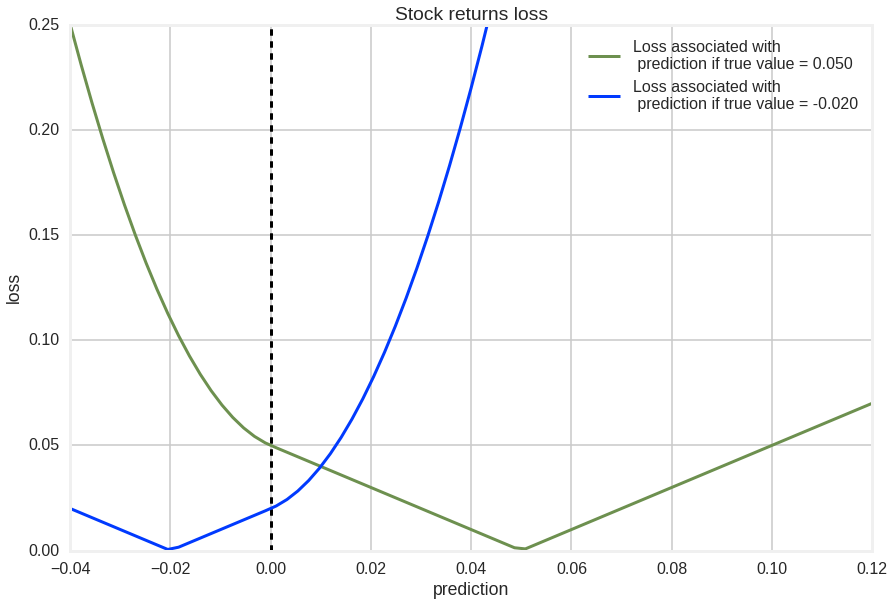

In [6]:
from IPython.display import Image
Image(filename='stock_loss.png')

$$\\[5pt]$$

### 0.4.2 Get and Clean data from Yahoo! Finance

-------------------------------


First, we define the list of ``instruments`` which we are going to use in constructions of our portfolio.
Then we develop the machinery to get data from the ``Yahoo! Finance`` and prepare (clean) the data to the 
appropriate format.

One of the functions below allows to communicate with the Yahoo Financial to get historical data on trading operations. Another one is used to add returns on 'Close' prices to the dataframe.

In [7]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Extraction the financial data from Yahoo! Finance
'''


from pandas.io.data import DataReader   
from datetime import datetime

instruments=['XOM', 'AAPL', 'MSFT', 'JNJ', 'GE', 'CVX', 'PG', 'WFC']


def getStockPrices(startdate=datetime(1986,9,1),enddate=datetime.now(),stocks =instruments):              
    '''returns the stock prices'''
    data= map(lambda x: DataReader(x,  "yahoo", startdate,enddate),stocks)
    for i,symbol in enumerate(stocks):
        data[i]['Symbol'] = stocks[i]
    return data


def addPctChange(dataframe,price='Close'):
    '''adds the percentage on the change of the price'''
    
    # get Series on the interested column
    _series = dataframe[price]
    _series = _series.pct_change()
    dataframe[price+'_pct_change'] = _series    
    return dataframe



# test of the reader and 'PctChange' adder
data=getStockPrices()
addPctChange(data[5]).dropna().head()

,Open,High,Low,Close,Volume,Adj Close,Symbol,Close_pct_change
Date,,,,,,,,
1986-09-03,44.125,45.500,44.125,45.500,3149200,3.886914,CVX,0.025352
1986-09-04,45.500,47.125,45.250,46.625,5000000,3.983019,CVX,0.024725
1986-09-05,46.750,47.125,46.625,47.000,5240000,4.015054,CVX,0.008043
1986-09-08,46.750,47.000,45.750,46.125,3881600,3.940306,CVX,-0.018617
1986-09-09,46.000,46.125,45.250,45.375,4120000,3.876236,CVX,-0.016260


Nice. Also we need to get the market capitalization of the companies those stocks are chosen as instruments.
The function below can be used not only to retrieve capitalization but also other interesting ``parameters`` of companies.

In [8]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Get Capitalization 
'''


feature_descriptions = {'a' : 'Ask',
'a2': 'Av. daily volume',
'a5': 'Ask size',
'b' : 'Bid',
'b2': 'Ask (real-time)',
'b3': 'Bid (real-time)',
'b4': 'Book value',
'b6': 'Bid size',
'c' : 'Change',
'c1': 'Change',
'c3': 'Commission',
'c6': 'Change (real-time)',
'c8': 'After hours change (real-time)',
'd' : 'Dividend/share',
'd1': 'Last trade date',
'd2': 'Trade date',
'e' : 'Earnings/share',
'e1': 'Error indication',
'e7': 'EPS est. current year',
'e8': 'EPS est. next year',
'e9': 'EPS est. next quarter',
'f6': 'Float shares',
'g' : 'Day\'s low',
'h' : 'Day\'s high',
'j' : '52-week low',
'k' : '52-week high',
'g1': 'Holdings gain',
'g3': 'Annualized gain',
'g4': 'Holdings gain',
'g5': 'Holdings gain (real-time)',
'g6': 'Holdings gain (real-time)',
'i' : 'More info',
'i5': 'Order book (real-time)',
'j1': 'Market capitalization',
'j3': 'Market capitalization (real-time)',
'j4': 'EBITDA',
'j5': 'Change from 52-week low',
'j6': 'Change from 52-week low',
'k1': 'Last trade (real-time)',
'k2': 'Change (real-time)',
'k3': 'Last trade size',
'k4': 'Change from 52-week high',
'k5': 'Change from 52-week high',
'l' : 'Last trade',
'l1': 'Last trade',
'l2': 'High limit',
'l3': 'Low limit',
'm' : 'Day\'s range',
'm2': 'Day\'s range (real-time)',
'm3': '50-day moving average',
'm4': '200-day moving average',
'm5': 'Change from 200-day moving average',
'm6': 'Change from 200-day moving average',
'm7': 'Change from 50-day moving average',
'm8': 'Change from 50-day moving average',
'n' : 'Name',
'n4': 'Notes',
'o' : 'Open',
'p' : 'Previous close',
'p1': 'Price paid',
'p2': 'Change',
'p5': 'Price/sales',
'p6': 'Price/book',
'q' : 'Ex-dividend date',
'r' : 'P/E ratio',
'r1': 'Dividend pay date',
'r2': 'P/E ratio (real-time)',
'r5': 'PEG ratio',
'r6': 'Price/EPS estimate current year',
'r7': 'Price/EPS estimate next year',
's' : 'Symbol',
's1': 'Shares owned',
's7': 'Short ratio',
't1': 'Last trade',
't6': 'Trade links',
't7': 'Ticker trend',
't8': '52-week target estimate',
'v' : 'Volume',
'v1': 'Holding\'s value',
'v7': 'Holding\'s value (real-time)',
'w' : '52-week range',
'w1': 'Day\'s value change',
'w4': 'Day\'s value change (real-time)',
'x' : 'Stock exchange',
'y' : 'Dividend & yeild'}

def getCapitalization(stocks =instruments,features=["j1","j3","r"],feature_descriptions=feature_descriptions): 
    '''returns caps'''
    
    _stocks = '+'.join(stocks).lower()    
    url= 'http://finance.yahoo.com/d/quotes.csv?s='+_stocks + '+&f=' +''.join(features)
          
    dataframe=pd.read_csv(url,names=[ value for key, value in feature_descriptions.iteritems() if key in features])    
    if ("j1" in features):
        dataframe[feature_descriptions["j1"]] = dataframe[feature_descriptions["j1"]].apply(lambda x: float(x.replace('B','')))
    dataframe['Symbol'] = map(lambda i: stocks[i],dataframe.index.values)    
    return dataframe

caps=getCapitalization()    

Before we go further and define the optimization procedure, we need to calculate the variance matrix of the 'Close' price to be used later:

In [9]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Get (Annual) Covariance Matrix, Mean (Annual) Returns
'''

def GetCovMatrix(dataframe,stocks =instruments,feature='Close'):
    '''creates the covariance matrix'''
    
    # add returns of the 'Close' to each dataframe of the stocks
    dataframe = map(lambda i: addPctChange(dataframe[i],feature), [i for i,_ in enumerate(stocks)])
    dataframe=map(lambda item: item[feature+"_pct_change"].as_matrix().tolist() ,dataframe)
    dataframe=pd.DataFrame(np.array(dataframe).T)
    #cov_matrix=dataframe.cov(min_periods=None).as_matrix()
    cov_matrix=dataframe.cov(min_periods=None)
    return cov_matrix

def GetCorrMatrix(dataframe,stocks =instruments,feature='Close'):
    '''creates the correlation matrix'''
    
    # add returns of the 'Close' to each dataframe of the stocks
    dataframe = map(lambda i: addPctChange(dataframe[i],feature), [i for i,_ in enumerate(stocks)])
    dataframe=map(lambda item: item[feature+"_pct_change"].as_matrix().tolist() ,dataframe)
    dataframe=pd.DataFrame(np.array(dataframe).T)
    cov_matrix=dataframe.cov(min_periods=None).as_matrix()
    V=np.diag(cov_matrix).reshape(1,-1)
    return pd.DataFrame(cov_matrix/np.sqrt(V*V.T))
    
def GetMeanReturns(dataframe,stocks =instruments,feature='Close'):
    '''calculates the mean of the returns for feature'''
    
    # add returns of the 'Close' to each dataframe of the stocks
    columns=stocks
    dataframe = map(lambda i: addPctChange(dataframe[i],feature), [i for i,_ in enumerate(stocks)])
    dataframe=map(lambda item: item[feature+"_pct_change"].as_matrix().tolist() ,dataframe)
    dataframe=pd.DataFrame(np.array(dataframe).T)
    dataframe.columns=columns
    return dataframe.describe().loc["mean",:]


def GetAnnualExpectedReturns(returns,period=250):
    ''' returns the expected returns for the 'period' days'''
    
    return returns.apply(lambda x: (1+x)**period -1)


def GetAnnualCovMatrix(dataframe,stocks =instruments,feature='Close',period=250):
    '''creates the covariance matrix for the 'period' of days '''
    
    # add returns of the 'Close' to each dataframe of the stocks
    dataframe = map(lambda i: addPctChange(dataframe[i],feature), [i for i,_ in enumerate(stocks)])
    dataframe=map(lambda item: item[feature+"_pct_change"].as_matrix().tolist() ,dataframe)
    dataframe=pd.DataFrame(np.array(dataframe).T)
    cov_matrix=dataframe.cov(min_periods=None).as_matrix()    
    return cov_matrix*period


'''
    the function, which returns from historical dataframe
    
        * Name of the instrument
        * Weight calculated from capitalization 
        * Annual Expected Return
        * Annual Covariance Matrix
        
       Name,Weight, Annual Expected Return  are combined in one DataFrame
'''
def ProcessHistoricaData(dataframe,caps,stocks =instruments,feature='Close',period=250):
    ''' returns processed information from the historical data'''

    annual_cov_matrix=GetAnnualCovMatrix(dataframe,stocks ,feature,period)
    returns=GetMeanReturns(dataframe,stocks,feature)
    annual_expect_returns=GetAnnualExpectedReturns(returns,period)
    
    total_cap =caps["Market capitalization"].sum()
    result_dataframe = caps.copy(True)
    result_dataframe=result_dataframe.drop("Market capitalization", 1).drop("Market capitalization (real-time)",1)
    #result_dataframe=result_dataframe.drop("Market capitalization (real-time)",1)
    result_dataframe["Weight"] = caps["Market capitalization"].apply(lambda x: x/total_cap)
    result_dataframe["AnnualExpectReturn"]=annual_expect_returns.values
    return result_dataframe,pd.DataFrame(annual_cov_matrix)
 
result_dataframe,cov_matrix = ProcessHistoricaData(data,caps)
result_dataframe

,P/E ratio,Symbol,Weight,AnnualExpectReturn
0,14.461,XOM,0.133227,0.055751
1,12.920,AAPL,0.250464,0.223660
2,31.610,MSFT,0.147102,0.135760
3,18.610,JNJ,0.105595,0.064417
4,NaN,GE,0.111426,0.040283
5,13.950,CVX,0.066873,0.071327
6,30.430,PG,0.079175,0.055048
7,12.800,WFC,0.106138,0.107425


I'd like to say that I use the post published at 
http://www.quantandfinancial.com/2013/07/mean-variance-portfolio-optimization.html as a reference to check that
my calculations are correct. So now I want to compare obtained results with ones presented in the blog.

In [10]:
'''function to print the obtained processed data
    I have taken it from 
    http://code.google.com/p/quantandfinancial/source/browse/trunk/example_black_litterman.py

    to compare the result with
    http://www.quantandfinancial.com/2013/07/mean-variance-portfolio-optimization.html
'''

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s" % ("Name", "Weight", "Return", "Dev"))
        
        for i in range(len(names)):
                print("%-10s %5.1f%% %5.1f%% %5.1f%%    " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5))
                
print_assets(result_dataframe["Symbol"].values,
             result_dataframe["Weight"].values,
             result_dataframe["AnnualExpectReturn"].values,
             cov_matrix.as_matrix()
            )                

Name       Weight Return    Dev
XOM         13.3%   5.6%  28.9%    
AAPL        25.0%  22.4%  51.1%    
MSFT        14.7%  13.6%  43.2%    
JNJ         10.6%   6.4%  29.3%    
GE          11.1%   4.0%  34.7%    
CVX          6.7%   7.1%  28.4%    
PG           7.9%   5.5%  30.2%    
WFC         10.6%  10.7%  41.0%    


$$\\[5pt]$$

### 0.4.3 Trade-off between Mean-variance  and Returns

-------------------------------

Mean returns are quantitatively measured by geometrically averaging series of daily or weekly returns over a certain period of time, while the uncertainty is expressed by the variance or standard deviation of such series.
Naturally more volatile the asset is, higher is also the expected return. This relationship is determined by the supply and demand forces on a capital market and may be mathematically expressed by one of the capital pricing models


Most of these pricing models are based on an assumption that only systematic risk is reflected in capital prices and therefore investors shouldn't expect additional risk premium by holding poorly diversified or standalone investments.

Assuming normal distribution of asset returns, we can quantitatively measure this diversification benefit by calculating correlation between two price series, which is equal or less than one.

Imagine, that we have the portfolio of the ``portfolio='XOM','CVX'`` stocks.
In case there is no diversification benefit,i.e the two assets doesn't correlate,
the risk(asset deviation)-return curve is a simple line connected to points on the space:

$ (r_{XOM},\sigma_{XOM}) $ and $ (r_{CVX},\sigma_{CVX}). $

Having the portfolio of  50%  for XOM' and 50% for 'CVX' stocks, we can annually 
expect to get 6% of the profit (returns) with the risk (deviations) of 8.2%.  

However, if the correlation between stocks,which is about 56%, is  taken into account,
the same portfolio will give us 6% of the profit (returns) and the risk (deviations) of 6%!  

It is shown on the plot below.

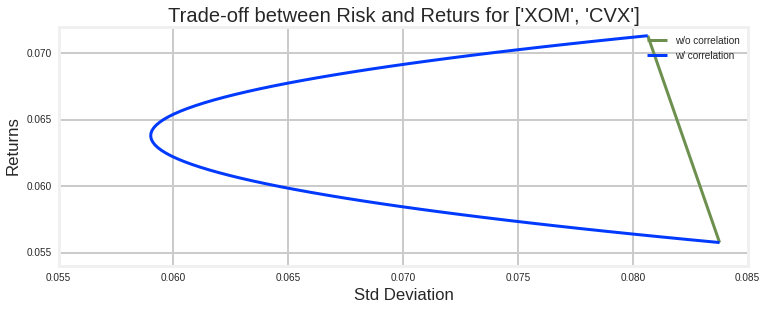

In [11]:
'''function to plot the same triangle plot as it is shown in the post
    http://3.bp.blogspot.com/-Yhb7BabPFY8/UeWpZSV8pHI/AAAAAAAABcQ/8cwnKXcckdA/s1600/meanvariance.png    
'''

def plot_mean_variance_returns(result_dataframe,cov_matrix,portfolio=['XOM','CVX']):
    
    assert len(portfolio) == 2, "portfolio should have only 2 instruments"
    returns = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)]['AnnualExpectReturn'].values
    indexes = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)].index.values
    fractions = np.linspace(0., 1., 75)
    total_std_deviations_no_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]], fractions)
    total_std_deviations_with_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]] -2*x*(1.-x)*cov_matrix.loc[indexes[0],indexes[1]], fractions)
    total_returns = map(lambda x:  x*returns[0]+ (1.-x)*returns[1], fractions)
    
    plt.plot(total_std_deviations_no_corr, total_returns,
         label="w/o correlation", lw=3)
    plt.plot(total_std_deviations_with_corr, total_returns,
         label="w/ correlation", lw=3)
    
    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs for %r"%portfolio);

    


plot_mean_variance_returns(result_dataframe,cov_matrix)

This plot brings the idea on a robust way to optimize the portfolio if it consists from two assets:

* Choose such pair of assets which has the minimal risk. All correlations between assets should be taken into account.

We call such method the Portfolio Mean-Variance Optimization with the minimum variance frontier ,i.e
**PMO** with  **MinimumVarianceFrontier**.


$$\\[5pt]$$

## 0.5 Portfolio mean-variance calculation and optimization

----------------

However we could extend our robust proposal by few things. First, we want to replace the merit of optimization:
instead of minimizing the variance of the portfolio $\sigma_P$, we will test  some kind of mean-variance utility function, such as a Sharpe ratio:

$$ s=\frac{r_P−r_f}{\sigma_P} $$

Here $r_P$ and $r_f$ are expected returns of the portfolio and ``risk-free rate``.
Second, we will be not limited by the portfolio of two assets, i.e we are going to use all possible combinations between different instruments.

Third and last, we need to define $r_P$, $\sigma_P$ and $r_f$.

The return $r_P$ of the portfolio  is determined by the formula

$$ r_P = W_i R_i,  $$

where $W_i$ is the vector of weights and $R_i$ is the vector of annual returns for chosen instruments.

The variance of the portfolio is defined as follows:

$$ C_P^{2} = W_iC_{ij}^2W_j,  $$

where $ C_{ij}^2 $ is the covariance matrix of our assets. This is so-called **PMO** with the **MinimumSharpeRatioFrontier**

In [12]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Calculation of the portfolio variance and return
'''

def portfolioReturn(W,R):
    ''' R_i*W_i '''
    return np.sum(R*W)

def portfolioVariance(W,C):
    ''' W_i*C_ij*W_j '''
    return np.dot(np.dot(C,W),W)



print "The  return of the portfolio consisted of all instruments\
 and weights based on the companies capitalization is %3.2f%%\n\n"%(100.*portfolioReturn(result_dataframe["Weight"].values,result_dataframe["AnnualExpectReturn"].values))


print "The  variance of the portfolio consisted of all instruments\
 and weights based on the companies capitalization is %3.2f%%"%(100.*portfolioVariance(result_dataframe["Weight"].values,cov_matrix.as_matrix()))


The  return of the portfolio consisted of all instruments and weights based on the companies capitalization is 11.52%


The  variance of the portfolio consisted of all instruments and weights based on the companies capitalization is 5.57%


In [13]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Portfolio mean-variance calculation and optimization with MinimumSharpeRatioFrontier
'''
import scipy

# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def MinimumSharpeRatioFrontier(R,C,rf):

        def fitness(W, R, C, rf):
                mean, var = portfolioReturn(W, R),portfolioVariance(W, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        n = len(R)
        W = ones([n])/n                                         # start optimization with equal weights
        b_ = [(0.,1.) for i in range(n)]        # weights for boundaries between 0%..100%. No leverage, no shorting
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })       # Sum of weights must be 100%
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)  
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x      

# rf taken from 
# http://people.stern.nyu.edu/adamodar/podcasts/cfspr15/cfsession6.pdf
# rf is 0.02 (only 2%) for US$.
Weights_optimal=MinimumSharpeRatioFrontier(result_dataframe["AnnualExpectReturn"].values,cov_matrix.as_matrix(),0.02)


print "New portfolio after optimization:\n\n"
print_assets(result_dataframe["Symbol"].values,
             Weights_optimal,
             result_dataframe["AnnualExpectReturn"].values,
             cov_matrix.as_matrix()
            )   

print "\n\n"

print "The  return of the portfolio consisted of all instruments\
 and optimal weights is %3.2f%%\n\n"%(100.*portfolioReturn(Weights_optimal,result_dataframe["AnnualExpectReturn"].values))


print "The  variance of the portfolio consisted of all instruments\
 and optimal weights  is %3.2f%%"%(100.*portfolioVariance(Weights_optimal,cov_matrix.as_matrix()))



New portfolio after optimization:


Name       Weight Return    Dev
XOM          0.0%   5.6%  28.9%    
AAPL        42.0%  22.4%  51.1%    
MSFT        20.4%  13.6%  43.2%    
JNJ          9.6%   6.4%  29.3%    
GE          -0.0%   4.0%  34.7%    
CVX         13.2%   7.1%  28.4%    
PG           0.0%   5.5%  30.2%    
WFC         14.8%  10.7%  41.0%    



The  return of the portfolio consisted of all instruments and optimal weights is 15.31%


The  variance of the portfolio consisted of all instruments and optimal weights  is 8.71%


The functions below plots the contributions of different portfolio constituent pairs and optimized portfolio parameters together:

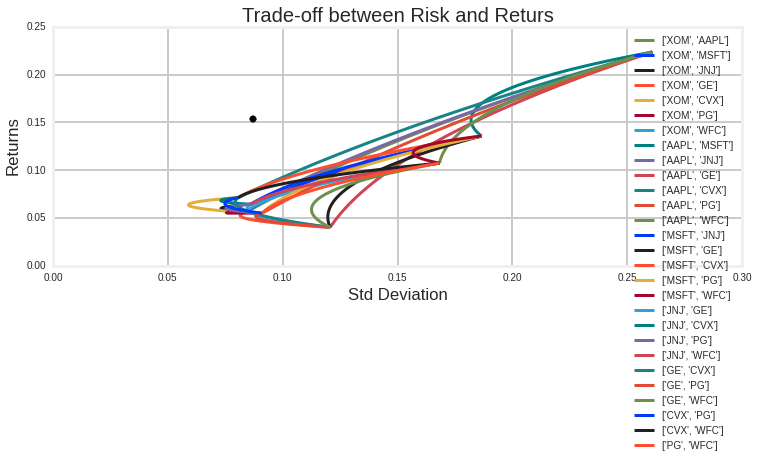

In [14]:
def plot_mean_variance_returns(result_dataframe,cov_matrix,portfolio=['XOM','CVX']):
    
    assert len(portfolio) == 2, "portfolio should have only 2 instruments"
    returns = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)]['AnnualExpectReturn'].values
    indexes = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)].index.values
    fractions = np.linspace(0., 1., 75)
    total_std_deviations_no_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]], fractions)
    total_std_deviations_with_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]] -2*x*(1.-x)*cov_matrix.loc[indexes[0],indexes[1]], fractions)
    total_returns = map(lambda x:  x*returns[0]+ (1.-x)*returns[1], fractions)
    
    plt.plot(total_std_deviations_with_corr, total_returns,
         label="%r"%portfolio, lw=3)
    
    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs");

pairs = []
for i,inst1 in enumerate(instruments):
    for j in range(i+1,len(instruments)):        
        if (i<len(instruments)-1):    pairs+=[[inst1,instruments[j]]]

for pair in pairs:
    plot_mean_variance_returns(result_dataframe,cov_matrix,portfolio=pair)
pl.scatter(portfolioVariance(Weights_optimal,cov_matrix.as_matrix()),portfolioReturn(Weights_optimal,result_dataframe["AnnualExpectReturn"].values),color="black",s=42,label='optimized value')

OK. It looks optimistic. Would we like to try **MinimumVarianceFrontier**? Yes.
We implement the **MinimumVarianceFrontier** with one small improvement:

> the previous  case has considered the utility function, which was the Sharpe ratio having two degrees of freedom - the mean and the variance.  This might give us the problem of underestimating the risks.

* Thus it would be better to find the minimal variance of the portfolio  at some levels of investor's risk aversion, represented by required return. So we define these levels (20 equidistant levels) and  iterate through them using the optimization algorithm in order to minimize the portfolio variance at each considered level.

As a result, we can avoid the use of the risk-free rate in this calculation: the different levels of the return are playing this role.


In [15]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Portfolio mean-variance calculation and optimization with MinimumVarianceFrontier
'''
import scipy

# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# variance minimization
def MinimumVarianceFrontier(R,C,num_levels=20):

        def fitness(W, R, C, r,penalty_factor=50.):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var =portfolioReturn(W, R),portfolioVariance(W, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = penalty_factor*abs(mean-r)
                return var + penalty

        frontier_level, frontier_return, frontier_var, frontier_weights = [], [], [], []
    
        n = len(R)        
        for r in linspace(min(R), max(R), num=num_levels): # Iterate through the range of returns                        
            W = ones([n])/n                                         # start optimization with equal weights
            b_ = [(0.,1.) for i in range(n)]        # weights for boundaries between 0%..100%. No leverage, no shorting
            c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })       # Sum of weights must be 100%
            optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)  
            if not optimized.success:
                raise BaseException(optimized.message)
            # add point to the min-var frontier [x,y] = [optimized.x, r]
            frontier_level += [r]
            frontier_return += [portfolioReturn(optimized.x, R)]
            frontier_var += [portfolioVariance(optimized.x, C)]
            frontier_weights += [optimized.x]
            
        return np.array(frontier_level), np.array(frontier_return), np.array(frontier_var), np.array(frontier_weights)


frontier_level, frontier_return,frontier_var,frontier_weights=MinimumVarianceFrontier(result_dataframe["AnnualExpectReturn"].values,cov_matrix.as_matrix())



for i,weight in enumerate(frontier_weights):
    print "\n\nNew portfolio at the level %3.2f%% after optimization:\n\n"%(100.*frontier_level[i])
    print_assets(result_dataframe["Symbol"].values,
             weight,
             result_dataframe["AnnualExpectReturn"].values,
             cov_matrix.as_matrix()
            )   

    print "\n\n"

    print "The  return of the portfolio consisted of all instruments and optimal weights is %3.2f%%\n\n"%(100.*frontier_return[i])


    print "The  variance of the portfolio consisted of all instruments and optimal weights  is %3.2f%%"%(100.*frontier_var[i])
        



New portfolio at the level 4.03% after optimization:


Name       Weight Return    Dev
XOM          0.0%   5.6%  28.9%    
AAPL        -0.0%  22.4%  51.1%    
MSFT        -0.0%  13.6%  43.2%    
JNJ         -0.0%   6.4%  29.3%    
GE         100.0%   4.0%  34.7%    
CVX         -0.0%   7.1%  28.4%    
PG           0.0%   5.5%  30.2%    
WFC         -0.0%  10.7%  41.0%    



The  return of the portfolio consisted of all instruments and optimal weights is 4.03%


The  variance of the portfolio consisted of all instruments and optimal weights  is 12.07%


New portfolio at the level 4.99% after optimization:


Name       Weight Return    Dev
XOM         26.3%   5.6%  28.9%    
AAPL        -0.0%  22.4%  51.1%    
MSFT         0.0%  13.6%  43.2%    
JNJ          6.4%   6.4%  29.3%    
GE          40.0%   4.0%  34.7%    
CVX          0.0%   7.1%  28.4%    
PG          27.2%   5.5%  30.2%    
WFC          0.0%  10.7%  41.0%    



The  return of the portfolio consisted of all instruments an


The plot below illustrates the behavior of the portfolio risk at the different levels of the profit (aversion).
The optimized portfolio shows that, first, the risk is decreased with increase of the profit
such that someone can achieve 3 times large  return's volume for the optimized portfolio at the unchanged risk level  which is below 12%! When the highest  values of the profit is reached, the portfolio risk is also high and it consist of 25%.

Also what can be interesting for us is the fact that the point obtained by **MinimumSharpeRatioFrontier**
lies on the curve given by **MinimumVarianceFrontier**, i.e the **MinimumVarianceFrontier** provides the general
solutions to the problem of the portfolio optimization.


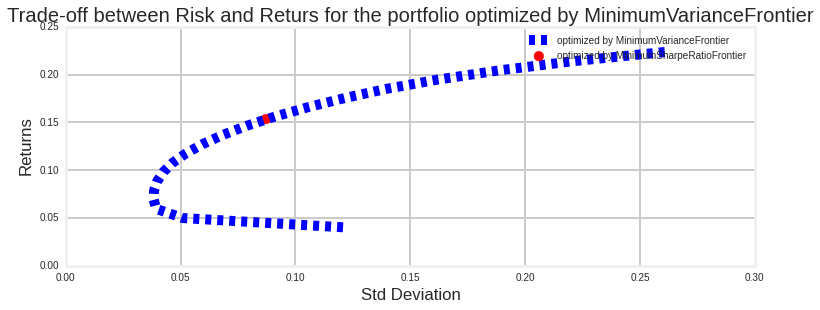

In [16]:
'''function to plot the optimzed portfolio risks vs aversion levels
'''

def plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights):
    
    plt.plot(frontier_var, frontier_return,  label="optimized by MinimumVarianceFrontier", linestyle='--',color="b", lw=10)
    
    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs for the portfolio optimized by MinimumVarianceFrontier");




pl.scatter(portfolioVariance(Weights_optimal,cov_matrix.as_matrix()),portfolioReturn(Weights_optimal,result_dataframe["AnnualExpectReturn"].values),color="red",s=92,label='optimized by MinimumSharpeRatioFrontier')
plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights)

Another plot demonstrates performance,i.e aversion levels and variances, of the portfolio optimized  by **MinimumVarianceFrosntier** and different return-variance curves for pairs of the consistuents of the portfolio.

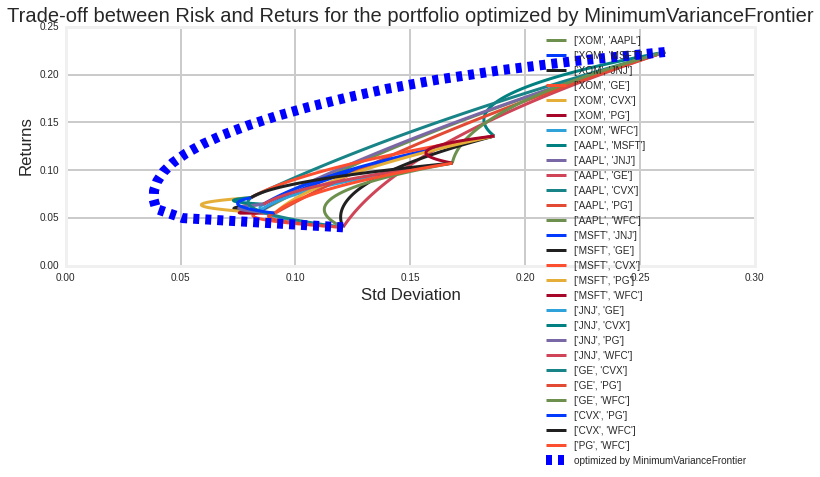

In [17]:
def plot_mean_variance_returns(result_dataframe,cov_matrix,portfolio=['XOM','CVX']):
    
    assert len(portfolio) == 2, "portfolio should have only 2 instruments"
    returns = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)]['AnnualExpectReturn'].values
    indexes = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)].index.values
    fractions = np.linspace(0., 1., 75)
    total_std_deviations_no_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]], fractions)
    total_std_deviations_with_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]] -2*x*(1.-x)*cov_matrix.loc[indexes[0],indexes[1]], fractions)
    total_returns = map(lambda x:  x*returns[0]+ (1.-x)*returns[1], fractions)
    
    plt.plot(total_std_deviations_with_corr, total_returns,
         label="%r"%portfolio, lw=3)
    
    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs");

pairs = []
for i,inst1 in enumerate(instruments):
    for j in range(i+1,len(instruments)):        
        if (i<len(instruments)-1):    pairs+=[[inst1,instruments[j]]]

for pair in pairs:
    plot_mean_variance_returns(result_dataframe,cov_matrix,portfolio=pair)
plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights)    

$$\\[5pt]$$

## 0.6 Black-Litterman model

------------------------------


The application of the **Black-Litterman model** is known as the technique of reverse optimization.
This technique is aimed to improve results obtained from the Mean-Variance Optimization Methods discussed above.
One can ask the naive question: 

> What is wrong with the **Mean-Variance Optimization**?

Well, the empirical studies show that expected asset returns  have a stochastic nature.
This explains the vast majority of optimal portfolio weightings and the fact that extrapolation of ``past`` returns into the ``future`` doesn't work well.

That is why the achievement of optimal and stable asset allocation would be a primary goal, rather than trying to predict future market returns.

I would like to address you to this  post <a name="ref-1"/>[(OndrejMartinsky, 2013)](#cite-BlLitterman) used by 
me as a sketch in this study. I will follow it to develop the machinery of the **Black-Litterman model**. 
Here are the main points related to the application of the  **Black-Litterman model** in optimization of the portfolio. They explain the reason of this approach, and they are consisted in the following:

>###**The world of efficient markets**

>To maximize investor's utility function, Modern Portfolio Theory suggests holding the combination of a risk-free asset and optimal risky portfolio (ORP) lying on a tangency of the efficient frontier and capital market line. Modern Portfolio Theory also suggests that optimal risky portfolio is a market portfolio (e.g. capitalization-weighted index).

>If we assume markets are fully efficient and all assets are fairly priced, we don't have any reason to deviate from the market portfolio in our asset allocation. In such case, we don't even need to know equilibrium asset returns nor perform any kind of portfolio optimization, as outlined in the previous article. An optimization based on equilibrium asset returns would lead back to the same market portfolio anyway.

So, these statements claim that if we believe to the market prices, we have to use the capitalization-based weights in our portfolio.  That's it, and no optimization is needed anymore!


>###**An active investor's view**

>The different situation is when investor believes the market as a whole is efficient, but has concerns about the performance of specific assets or asset classes due to the possession of material non-public information, resulting for example from superior fundamental analysis.

This case covers the problem of the non-public information.
If such information is available, why not to use it in the portfolio building? And this is exactly what
the **Black-Litterman model** cares about.

Here is the schematic view of all  processes incorporated in the **Black-Litterman model**
<img src="http://4.bp.blogspot.com/-gc1zf6UG5JU/UhtOI7w7OzI/AAAAAAAABew/aHhGjkZxKz0/s1600/fig_b.png" width = 300/>

The model consists from two parts:

* the forward-optimization part;
* the  reverse optimization part.

>The forward-optimization part in this model is the same as in the classic **MVO** process (boxes $b, g, i, j, k, l$). However, the thing which differs is a way how we are observing expected asset returns, which is one of the inputs into the forward optimizer ($g$). Previously we have used **historical asset returns** as a proxy.

>Now, as we can see in the diagram, equilibrium excess asset returns are used instead ($d$ or $g$).
Equilibrium asset returns ($d$) are returns implied from the market capitalization weights of individual assets or asset classes ($a$) and historical asset covariances ($b$) in a process known as reverse optimization ($c$).

>Forward ($h$) and reverse ($c$) optimizations are mutually inverse functions! Therefore, forward-optimizing equilibrium asset returns ($d$) would yield to the optimal risky portfolio ($j$) with exactly the same weights as the weights observed from assets' capitalization ($a$).

>However, the beauty of the Black-Litterman model comes with the ability to adjust equilibrium market returns ($f$) by incorporating views into it and therefore to get optimal risky portfolio ($j$) reflecting those views. This ORP portfolio may be therefore different to the initial market cap weights ($a$).

$$\\[5pt]$$

### 0.6.1 Reverse optimization of equilibrium returns

------------------------

The novel part of this approach is the reverse optimization and equilibrium returns.

First, let's define the **equilibrium excess returns**.

>**Equilibrium excess market returns** are those implied by the capitalization weights of market constituents. They represent more reasonable estimates than those derived from historical performance. 

This means that the equilibrium excess returns is a function of the capitalizations.
Also, please, pay attention on the words **"equilibrium excess"**. This **equilibrium excess** says that
we will use the "efficient" returns $\hat R$, constructed as, 

$$\hat R \sim Equilibrium\_excess\_returns + r_f  $$ 

as  objects of further optimizations, i.e the $R$ should and will be replaced by $\hat R$ everywhere in optimization algorithms.

Equilibrium excess returns $\pi_P$ are derived in Black-Litterman using this formula:

$$\lambda_P=\frac{r_P−r_f}{\sigma_P^2},\\$$
$$ r_P = W_iR_i, \\$$
$$\pi_{P,i} = \lambda_{P}C_{ij}W_j,$$

where $W_i$,$R_i$, $r_R$ and $C_{ij}$ have already been introduced in the discussion made for Mean-Variance Optimization. The new quantity here is only the the equilibrium returns $\pi_{P,i}$.

In [18]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Calculation of the equilibrium excess returns
'''

def EquilibriumExcessReturn(MeanP,VarP,Rf,W,C):
    ''' pi_i =  \lambda_{P}C_{ij}W_j '''
    
    lambdaP = (MeanP-Rf)/VarP    
    return  np.dot(np.dot(lambdaP, C), W)   


def print_assets_2(names, W, R, Pi,C):
        print("%-10s %6s %6s %6s %6s" % ("Name", "Weight", "Return", "Pi", "Dev"))
        
        for i in range(len(names)):
                print("%-10s %5.1f%% %5.1f%% %5.1f%%  %5.1f%%    " % (names[i], 100*W[i], 100*R[i],100*Pi[i] ,100*C[i,i]**.5))


                
# calculation of the equilibrium excess returns
MeanP = portfolioReturn(result_dataframe["Weight"].values,result_dataframe["AnnualExpectReturn"].values)
VarP = portfolioVariance(result_dataframe["Weight"].values,cov_matrix.as_matrix())
equil_excess_returns = EquilibriumExcessReturn(MeanP,VarP,0.02,result_dataframe["Weight"].values,cov_matrix.as_matrix())


print_assets_2(result_dataframe["Symbol"].values,
             result_dataframe["Weight"].values,
             result_dataframe["AnnualExpectReturn"].values,equil_excess_returns,
             cov_matrix.as_matrix()
            )   


Name       Weight Return     Pi    Dev
XOM         13.3%   5.6%   6.2%   28.9%    
AAPL        25.0%  22.4%  15.8%   51.1%    
MSFT        14.7%  13.6%  10.7%   43.2%    
JNJ         10.6%   6.4%   5.2%   29.3%    
GE          11.1%   4.0%   8.1%   34.7%    
CVX          6.7%   7.1%   5.5%   28.4%    
PG           7.9%   5.5%   5.2%   30.2%    
WFC         10.6%  10.7%   8.8%   41.0%    


The table above shows the overall tendency: as it is clear from the definitions, $\pi_{P,i}$ will be proportional to the product of the capitalization weight and standard deviation of the asset. Also it is
interesting to notice that the procedure ``EquilibriumExcessReturn`` will decrease the level of statistical fluctuations in returns:

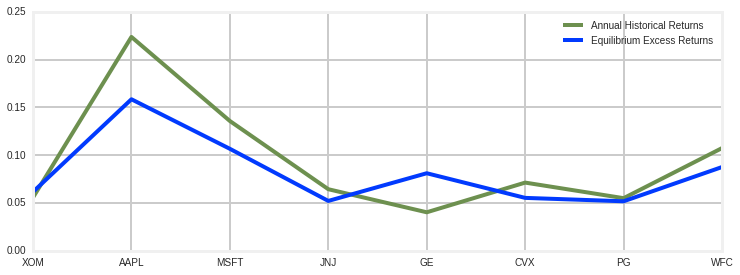

In [19]:
x=np.linspace(0,len(result_dataframe["AnnualExpectReturn"].values),len(result_dataframe["AnnualExpectReturn"].values))
pl.plot(x,result_dataframe["AnnualExpectReturn"].values,label="Annual Historical Returns")
pl.plot(x,equil_excess_returns,label="Equilibrium Excess Returns")
pl.xticks(x, result_dataframe["Symbol"].values)
pl.legend()

Now let's compare the mean-variance characteristics of some asset pair before and after application of the ``equilibrium excess``:

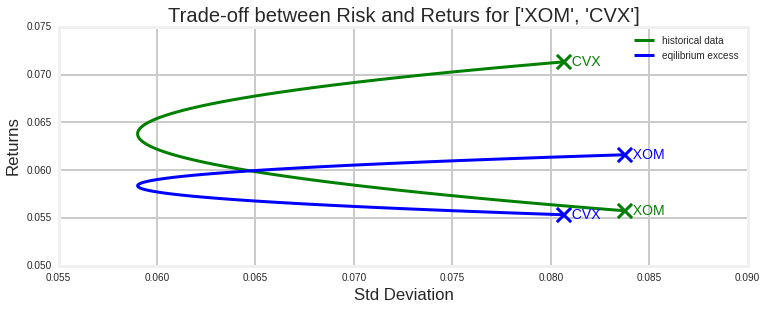

In [20]:
def plot_mean_variance_equilibrium_excess_returns(result_dataframe,cov_matrix,equil_excess_returns,portfolio=['XOM','CVX'],rf=.0):
    
    assert len(portfolio) == 2, "portfolio should have only 2 instruments"
    returns = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)]['AnnualExpectReturn'].values    
    indexes = result_dataframe.loc[result_dataframe["Symbol"].isin(portfolio)].index.values
    eq_returns = [equil_excess_returns[indexes[0]]+ rf,equil_excess_returns[indexes[1]]+ rf]
    fractions = np.linspace(0., 1., 75)    
    total_std_deviations_with_corr = map(lambda x:  x*cov_matrix.loc[indexes[0],indexes[0]] + (1.-x)*cov_matrix.loc[indexes[1],indexes[1]] -2*x*(1.-x)*cov_matrix.loc[indexes[0],indexes[1]], fractions)
    total_returns = map(lambda x:  x*returns[0]+ (1.-x)*returns[1], fractions)
    equilibrium_returns = map(lambda x:  x*eq_returns[0]+ (1.-x)*eq_returns[1], fractions)
    
    

    
    plt.plot(total_std_deviations_with_corr, total_returns,
         label="historical data", lw=3,color="green")
    plt.plot(total_std_deviations_with_corr, equilibrium_returns,
         label="eqilibrium excess", lw=3,color="blue")    
    for i,label in enumerate(portfolio):
        pl.scatter([cov_matrix.loc[indexes[i],indexes[i]]], [returns[i]], marker='x',s=202,lw=3,color="green")  # draw assets   
        pl.text(cov_matrix.loc[indexes[i],indexes[i]], returns[i], '  %s'%label, verticalalignment='center', color="green") 
        pl.scatter([cov_matrix.loc[indexes[i],indexes[i]]], [eq_returns[i] ], marker='x',s=202,lw=3,color="blue")  # draw assets   
        pl.text(cov_matrix.loc[indexes[i],indexes[i]], eq_returns[i], '  %s'%label, verticalalignment='center', color="blue") 

    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs for %r"%portfolio);

    


plot_mean_variance_equilibrium_excess_returns(result_dataframe,cov_matrix,equil_excess_returns)

From the plot above, we see that ``equilibrium excess`` calculation makes the returns of two assets to be closer to each other in a two-asset portfolio model.

$$\\[5pt]$$

### 0.6.2 Forward optimization of equilibrium returns without application of investor views

------------------------


Just for fun, imagine, that we don't have private information, and consequently, we can skip application of 
views $(e)$ and $(f)$ in the workflow of the model. 
Let's make a Forward optimization with a help of the ``MinimumVarianceFrontier`` then.

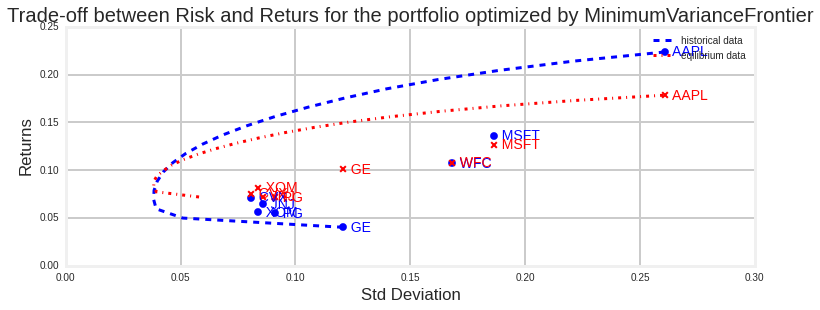

In [21]:
rf=.02
frontier_level, frontier_return_equilibr,frontier_var_equilibr,frontier_weights_equilibr=MinimumVarianceFrontier(equil_excess_returns+rf,cov_matrix.as_matrix())


'''function to plot the optimzed portfolio risks vs aversion levels
'''

def plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights,linestyle='--',color="b",label="optimized by MinimumVarianceFrontier"):
    
    plt.plot(frontier_var, frontier_return, linestyle=linestyle,color=color,label=label,  lw=3)
    
    plt.xlabel("Std Deviation")
    plt.ylabel("Returns")
    plt.legend()
    plt.title("Trade-off between Risk and Returs for the portfolio optimized by MinimumVarianceFrontier");


plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights,color="b",label="historical data")    
plot_optimized_portfolio_at_levels(frontier_level, frontier_return_equilibr,frontier_var_equilibr,frontier_weights_equilibr,linestyle='-.',color="r",label="eqilibrium data")

for i,label in enumerate(result_dataframe["Symbol"].values):
    pl.scatter([cov_matrix.loc[i,i]], [result_dataframe['AnnualExpectReturn'].values[i]], marker='o',s=22,lw=3,color="blue")  # draw assets   
    pl.text(cov_matrix.loc[i,i], result_dataframe['AnnualExpectReturn'].values[i], '  %s'%label, verticalalignment='center', color="blue") 
    pl.scatter([cov_matrix.loc[i,i]], [equil_excess_returns[i]+rf], marker='x',s=32,lw=2,color="red")  # draw assets   
    pl.text(cov_matrix.loc[i,i], equil_excess_returns[i]+rf, '  %s'%label, verticalalignment='center', color="red") 


$$\\[5pt]$$

### 0.6.3 Forward optimization of equilibrium returns with application of investor views

---------------------

>As we have already mentioned, the whole idea behind the reverse and forward optimization in Black-Litterman model is a process of incorporating custom views to the returns. The good news is that the whole process can be expressed as mathematical formula, while the bad news is that the steps to derive this formula are beyond the scope of this article.

>Given the views and links matrices $Q$ and $P$, we calculate view-adjusted excess returns $\pi^{\prime}_{P,ij}$ as follows:

$$\tau=0.025,\\$$
$$\Omega_{im}=\tau⋅P_{ij}\cdot C_{jk}\cdot  P^{T}_{km},\\$$


$$\pi^{\prime}_{P,i}=\left([(\tau\cdot C)^{-1} + P^T\cdot \Omega^{-1} \cdot P]^{-1}\right)_{ij} \left([(\tau\cdot C)^{-1}\cdot \pi_{P} + P^T\cdot \Omega^{-1} \cdot Q^T]^{-1}\right)_{j},$$

where $\tau$ is scaling factor, $\Omega_{im}$ is uncertainty matrix and $\pi^{\prime}_{P,i}$ is a vector of view-adjusted equilibrium excess returns. 

* The matrix $P$ is a link matrix having (0,1,-1) in rows. 

* The matrix $Q$ is a view matrix providing us some private information.

The matrix $P$ usually indicates our understanding on  connections between shares,instruments,assets etc obtained from the private information.


$$\\[3pt]$$
**What kind of the information does the view matrix $Q$ can handle?**
$$\\[3pt]$$

Usually, this information is about ``"outperformance"`` and ``"underperformance"`` of one asset over another asset. 

From http://dictionary.cambridge.org/dictionary/english/outperformance:

> ``Outperformance``  -- the fact of producing more money for investors than other shares, bonds, etc. of a similar type.

The ``Underperfomance`` can be formulated similar.

So if somebody tells us as a secret:

* Microsoft (MSFT) will outperform General Electric (GE) by 5% 

Then, using our definition of instruments

    instruments=['XOM', 'AAPL', 'MSFT', 'JNJ', 'GE', 'CVX', 'PG', 'WFC']

we can easily define the view and links matrices as follows:

$$Q_{1\times 1} = \begin{pmatrix} 
0.05 
\end{pmatrix},\\
$$
$$P_{1\times 8} = \begin{pmatrix} 
0 & 0 & 1 & 0 & -1 & 0 & 0 & 0
\end{pmatrix}.\\
$$

If somebody tells us as another secret:

* Microsoft (MSFT) will outperform General Electric (GE) by 5% 

and 

* Apple (AAPL) will under-perform Johnson & Johnson (JNJ) by 6%

the corresponding matrices take the forms

$$Q_{1\times 2} = \begin{pmatrix} 
0.05 & 0.06
\end{pmatrix},\\$$

$$P_{2\times 8} = \begin{pmatrix}
0 & 0 & 1 & 0 & -1 & 0 & 0 & 0 \\
0 & -1 & 0 & 1 & 0 & 0 & 0 & 0 \\
\end{pmatrix} \\
$$
$$\\[2.4pt]$$
Please note that rather than specifying uncertainty matrix $\Omega$ of views P explicitly by the investor, we derive it from the formula above. It's because we believe that volatility of assets represented by covariance matrix $C$ is affecting certainty of both returns and views in a similar way!

Only the factor $\tau$ explicitly controls  a precision of the investor views.

Let's try to code the mechanism of links $P$ and views $Q$.

In [22]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Calculation of the equilibrium excess returns with links and views provided by an invsetor
'''

from numpy.linalg import inv

def EquilibriumExcessReturnPrime(pi,tau,P,Q,C):
    '''  calculates the \pi_i^{\prime}  '''
    
    
    
    ## calculation of the omega - uncertainty matrix about views
    ## $$\Omega_{im}=\tau⋅P_{ij}\cdot C_{jk}\cdot  P^{T}_{km},\\$$
    Omega = np.dot(np.dot(np.dot(tau, P), C), P.T) # 0.025 * P * C * transpose(P)
    
    # calculation of equilibrium excess returns with views incorporated
    # $$\pi^{\prime}_{P,i}=\left([(\tau\cdot C)^{-1} + P^T\cdot \Omega^{-1} \cdot P]^{-1}\right)_{ij} 
    # \left([(\tau\cdot C)^{-1}\cdot \pi_{P} + P^T\cdot \Omega^{-1} \cdot Q]^{-1}\right)_{j},$$
        
    sub_a = inv(np.dot(tau, C))    
    sub_b = np.dot(np.dot(P.T, inv(Omega)), P)    
    sub_c = np.dot(inv(np.dot(tau, C)), pi)
    sub_d = np.dot(np.dot(P.T, inv(Omega)), Q.T)
    sub_d = np.reshape(sub_d,len(pi))
    
    
    pi_prime = np.dot(inv(sub_a + sub_b), (sub_c + sub_d))
    return pi_prime


def print_assets_3(names, W, R, Pi,Pi_prime,C):
        print("%-10s %6s %6s %6s %6s %6s" % ("Name", "Weight", "Return", "Pi","Pi_prime", "Dev"))
        
        for i in range(len(names)):
                print("%-10s %5.1f%% %5.1f%% %5.1f%%  %5.1f%%   %5.1f%%  " % (names[i], 100*W[i], 100*R[i],100*Pi[i],100.*Pi_prime[i] ,100*C[i,i]**.5))




# A link matrix
P=np.array([
    [0. , 0. , 1. , 0. , -1. , 0. , 0. , 0.],
    [0. , -1. , 0. , 1. , 0. , 0. , 0. , 0.],        
    ])

print "\n\nThe shape of the Link Matrix: ", P.shape,'\n\n'

# A view matrix
Q=np.array([
    [0.05 , 0.06],
    ])

print "\n\nThe shape of the View Matrix: ", Q.shape,'\n\n'

tau=0.025 # a precision parameter
#Omega = np.dot(np.dot(np.dot(tau, P), cov_matrix.as_matrix()), P.T) # 0.025 * P * C * transpose(P)
#print Omega
pi_prime=EquilibriumExcessReturnPrime(equil_excess_returns,tau,P,Q,cov_matrix.as_matrix())





The shape of the Link Matrix:  (2, 8) 




The shape of the View Matrix:  (1, 2) 




It seems that introducing the private information wee have to relocate the variance of instruments having the 
new correlations in a head:

In [23]:
# covariance matrix from private information
Omega = np.dot(np.dot(np.dot(tau, P), cov_matrix.as_matrix()), P.T)

# function to correct old C covariance function.
def correct_cov_matrix_view(Omega,C,P):
    for i in range(len(P)):
        indexes=np.where(P[i] != 0.)
        for j,indx in enumerate(indexes[0]):
            C[indx,indx]+=Omega[i][j]
    return C        


cov_matrix_2 = correct_cov_matrix_view(Omega,cov_matrix.as_matrix(),P)


In [24]:
print_assets_3(result_dataframe["Symbol"].values,
             result_dataframe["Weight"].values,
             result_dataframe["AnnualExpectReturn"].values,
             equil_excess_returns,
             pi_prime,
             cov_matrix_2
            )  

Name       Weight Return     Pi Pi_prime    Dev
XOM         13.3%   5.6%   6.2%    6.1%    28.9%  
AAPL        25.0%  22.4%  15.8%    9.3%    51.0%  
MSFT        14.7%  13.6%  10.7%   10.8%    43.8%  
JNJ         10.6%   6.4%   5.2%    7.0%    30.6%  
GE          11.1%   4.0%   8.1%    7.0%    34.7%  
CVX          6.7%   7.1%   5.5%    5.4%    28.4%  
PG           7.9%   5.5%   5.2%    5.3%    30.2%  
WFC         10.6%  10.7%   8.8%    8.2%    41.0%  


Wow! It looks like we have done in the right direction. The outperformance of ``MSFT`` coded in the $P$ and $Q$ matrices increases its equilibrium excess return from 10.7% to 10.9% while GE value was decreased from 8.1% to 7.1%. Ok. Now we would like to make the last exercise with equilibrium excess returns: the forward optimization of the $\pi_{P,i}^{\prime}$ with the ``MinimumVarianceFrontier``.

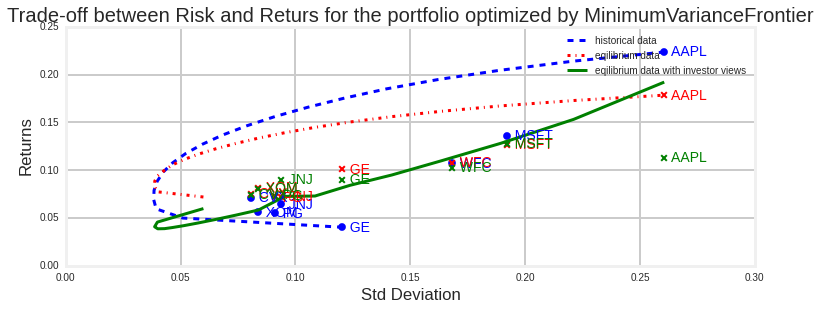

In [25]:
rf=.02
frontier_level, frontier_return_equilibr,frontier_var_equilibr,frontier_weights_equilibr=MinimumVarianceFrontier(equil_excess_returns+rf,cov_matrix.as_matrix())
frontier_level, frontier_return_equilibr_prime,frontier_var_equilibr_prime,frontier_weights_equilibr_prime=MinimumVarianceFrontier(pi_prime+rf,cov_matrix_2)

plot_optimized_portfolio_at_levels(frontier_level, frontier_return,frontier_var,frontier_weights,color="b",label="historical data")    
plot_optimized_portfolio_at_levels(frontier_level, frontier_return_equilibr,frontier_var_equilibr,frontier_weights_equilibr,linestyle='-.',color="r",label="eqilibrium data")
plot_optimized_portfolio_at_levels(frontier_level, frontier_var_equilibr_prime,frontier_var_equilibr,frontier_weights_equilibr_prime,linestyle='-',color="g",label="eqilibrium data with investor views")

for i,label in enumerate(result_dataframe["Symbol"].values):
    pl.scatter([cov_matrix.loc[i,i]], [result_dataframe['AnnualExpectReturn'].values[i]], marker='o',s=22,lw=3,color="blue")  # draw assets   
    pl.text(cov_matrix.loc[i,i], result_dataframe['AnnualExpectReturn'].values[i], '  %s'%label, verticalalignment='center', color="blue") 
    pl.scatter([cov_matrix.loc[i,i]], [equil_excess_returns[i]+rf], marker='x',s=32,lw=2,color="red")  # draw assets   
    pl.text(cov_matrix.loc[i,i], equil_excess_returns[i]+rf, '  %s'%label, verticalalignment='center', color="red") 
    pl.scatter([cov_matrix.loc[i,i]], [pi_prime[i]+rf], marker='x',s=32,lw=2,color="green")  # draw assets   
    pl.text(cov_matrix.loc[i,i], pi_prime[i]+rf, '  %s'%label, verticalalignment='center', color="green") 



$$\\[5pt]$$

## 0.7 Kelly Criterion

-----------------

So far, we have considered the case when the investors could buy shares of companies taken in the portfolio.
The key point "buy" can have two meanings:

* investors "buy" something using only fonds and money which belong them;
* they "buy" something using fonds and money which belong them + a loan provided by a broker


We have understood the first meaning of the  "buy" in our discussions early. Now we want to study the 
case when an external "leverage" is possible. What does the leverage mean?

$$\\[5pt]$$

### 0.7.1 Leverage definition

-----------------



We will define leverage as the ratio of the size of a portfolio to the actual account equity within that portfolio. 

Here is an example of the purchasing a house with a mortgage taken from the post
https://www.quantstart.com/articles/Money-Management-via-the-Kelly-Criterion:
>To make this clear we can use the analogy of purchasing a house with a mortgage. 

>**A mortgage loan, also referred to as a mortgage, is used by purchasers of real property to raise capital to buy real estate; or by existing property owners to raise funds for any purpose while putting a lien on the property being mortgaged. The loan is "secured" on the borrower's property.**

>Your down payment (or "deposit" for those of us in the UK!) constitutes your account equity, while the down payment plus the mortgage value constitutes the equivalent of the size of a portfolio. Thus a down payment of 50,000 USD on a 200,000 USD house (with a mortgage of 150,000 USD) constitutes a leverage of (150000+50000)/50000=4. Thus in this instance you would be 4x leveraged on the house.


$$\\[5pt]$$

### 0.7.2 Assumptions

-----------------

Before we state the Kelly Criterion specifically let's outline the assumptions that go into its derivation: 

* returns  are normally distributed (i.e. Gaussian). Further, each instrument has its own fixed mean and standard deviation of returns. The formula assumes that these mean and std values do not change, i.e. that they are same in the past as in the future. This is clearly not the case with most strategies, so be aware of this assumption.

* The returns being considered here are excess returns, which means they are net of all financing costs such as interest paid on margin and transaction costs. 

* All of the trading profits are reinvested and no withdrawals of equity are carried out. This is clearly not as applicable in an institutional setting where the above mentioned management fees are taken out and investors often make withdrawals.

* **All of the strategies are statistically independent (there is no correlation between strategies) and thus the covariance matrix between strategy returns is diagonal!**


$$\\[5pt]$$

### 0.7.3 Kelly Criterion Formulation

-----------------

Let's imagine that we have a portfolio of $N$ instruments  and we wish to determine both how to apply optimal leverage per instrument in order to maximize growth rate (but minimize drawdowns) and how to allocate capital between each asset. 

If we denote the allocation between each asset $i$ as a vector $f$ of length $N$, s.t. $f=(f_1,...,f_N)$, then the Kelly Criterion for optimal allocation to each instrument $f_i$ is given by:

$$f_i=\mu_i/\sigma^2_i,\\$$

Where $\mu_i$ are the mean excess returns and $\sigma_i$ are the standard deviation of excess returns for a instrument $i$. This formula essentially describes the optimal leverage that should be applied to each instrument. Let's get a little bit practice with this criterion.

In [26]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Calculation of the leverage using Kelly Criterion
'''

def KellyCriterionLeverage(means,rf,C,W):
    ''' returns the leverages, fractions of the fond to be assigned to each instrument, and 
    expected long-term compounded growth rate, g'''
    
    meanP, varP = portfolioReturn(W, means),portfolioVariance(W, C)      # calculate mean/variance of the portfolio
    
    
    sigmas = np.diag(C)
    means_without_rf = means- rf
    #total_leverage=sum(means_without_rf/sigmas**2)
    total_leverage=sum(means_without_rf/sigmas)
    # sharpe ratio of the portfolio
    sP= (meanP - rf) / sqrt(varP)
    #growth rate
    g=rf + sP**2/2.
    #return means_without_rf/sigmas**2,means_without_rf/sigmas**2/total_leverage,g
    return means_without_rf/sigmas,means_without_rf/sigmas/total_leverage,g

rf=.02

print KellyCriterionLeverage(result_dataframe["AnnualExpectReturn"].values,rf,cov_matrix.as_matrix(),result_dataframe["Weight"].values)






(array([ 0.42673468,  0.78165834,  0.60258079,  0.47425392,  0.16859565,
        0.63641134,  0.38497619,  0.51948301]), array([ 0.10682538,  0.19567415,  0.1508453 ,  0.11872097,  0.0422049 ,
        0.15931417,  0.09637189,  0.13004326]), 0.10111899315930686)


$$\\[5pt]$$

### 0.7.4 Kelly Criterion in Practice: LET'S MAKE YOURSELF A MILLIONARE

-----------------


>It is important to be aware that the Kelly Criterion requires a continuous rebalancing of capital allocation in order to remain valid. Clearly this is not possible in the discrete setting of actual trading and so an approximation must be made. The standard "rule of thumb" here is to update the Kelly allocation once a day. Further, the Kelly Criterion itself should be recalculated periodically, using a trailing mean and standard deviation with a lookback window.


So, in next sections of the notebook, I want to simulate the Kelly Criterion Machinery:
* rebalancing of capital allocation according to the Kelly Criterion 
* recalculating the Kelly Criterion  itself using the trailing mean and standard deviations with a lookback
window of the 6 months.

In [27]:
'''
    Igor Marfin <Unister Gmb, 2014> igor.marfin@unister.de
    
    Simulation of the trading operation using Kelly Criterion
'''
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import math



# Free-Risk rate
rf=.02

# period of the simulations
start_date_simulations = datetime(2011,9,1)
end_date_simulations = datetime(2015,10,13) # today

# money of the investor i
# 100000$ or 1000 $ ?
account_equity=100000 # 100K $
#account_equity=1000 # 1K $

# period of kelly rebalancing: 1 day. We recalculate our portfolio each day
period_kelly_rebalancing = relativedelta(days=+1)

# period of kelly recalculation: 15 days
period_kelly_recalculation=+15

# a lookback window: 6 month
lookback_window = relativedelta(months=-6)

# portfolio fractions: fractions on which we split our investment:
portfolio_fractions =  result_dataframe["Weight"].values # using capitalization 




def SplitAccountEquity(stocks=instruments,fractions=portfolio_fractions,account_equity=account_equity,leverages=None):
    ''' returns the account_equity splited into fraction according to the weights of instruments '''
    splited_account_equity={}
    if leverages is None:
        for i,stock in enumerate(instruments):
            splited_account_equity.update({stock:account_equity*fractions[i]})
        return splited_account_equity,fractions
    else:
        new_fractions = []
        for i,leverage in enumerate(leverages):  
            new_fractions+=[ fractions[i] if leverage>0. else 0. ]
            #new_fractions+=[ fractions[i] if leverage>1. else 0. ]         
        new_fractions=np.array(new_fractions)/sum(new_fractions)
        new_fractions=new_fractions.tolist()
        for i,stock in enumerate(instruments):
            splited_account_equity.update({stock:account_equity*new_fractions[i]})
        return splited_account_equity,new_fractions
    
    
    
def getBrokerMargin(leverage,invest_money):
    ''' returns the marging of the broker and the total size of a portfolio. '''
    
    #assert float(invest_money) !=0., 'Do you have an investment fond?'
    #assert float(leverage) >=1., 'leverage should not be less than 1'
    broker_margin = float(invest_money)*(float(leverage)-1.)    
    if (broker_margin<0.): broker_margin=0.
    total_invest =   broker_margin+ float(invest_money)
    if (leverage<0.): total_invest=0.
    
    return broker_margin,total_invest



def LeverageOfPortfolio(splited_account_equity,means,rf,C,W=portfolio_fractions, stocks=instruments):
    ''' calculates the leverages of the instruments using the Kelly Criterion
        and returns them, total leverage, total size of the portfolio and assigned budgets for trading operations on each instrument
    '''
    
    leverages,_,_ =  KellyCriterionLeverage(means,rf,C,W)
    leverages=map(lambda x: max(1.1,x) if x>0. else float(x),leverages)
 
    
    #leverages = map(lambda x: 1. if float(x)<1. else float(x),leverages)
    
    total_broker_margin=0.
    total_portfoio_size=0.
    total_account_equity =  sum(splited_account_equity.values())
    assert total_account_equity !=0.,'Do you have money?'
    assigned_budgets={}
    for i,stock in enumerate(stocks):
        broker_margin,assigned_budget = getBrokerMargin(leverages[i],splited_account_equity[stock])
        total_broker_margin += broker_margin
        total_portfoio_size += assigned_budget
        assigned_budgets.update({stock:assigned_budget})

    return leverages,(total_account_equity+total_broker_margin)/total_account_equity,total_portfoio_size, total_broker_margin, assigned_budgets
    
    
    
def ExtractHistoricalDataInPeriod(dataframe,start_date,end_date):
    ''' returns the data in the period '''
    return [ data.ix[ (data.index >=start_date) & (data.index <=end_date) ]  for data in dataframe ] 



def NumberOfSharesToBuy(data,date,budget,stocks=instruments,feature='Close'):
    ''' returns the number of shares to buy for each asset'''
    data = ExtractHistoricalDataInPeriod(data,date,date)
    prices = map(lambda item: item[feature].values[0] ,data)
    return np.array([ math.floor(budget[stock]/prices[i]) for i,stock in enumerate(stocks)]),prices



def profit(data,stock_holdings,stocks=instruments,feature='Close'):
    ''' returns the number of obtained profit '''
    
    returns = map(lambda item: item[feature+'_pct_change'].values[0] ,data)
    today_prices = map(lambda item: item[feature].values[0] ,data)
    yesterday_prices = [ today_prices[i]/(1.+rtn)for i,rtn in enumerate(returns) ]    
    portfolio_profit={k:(today_prices[i]-yesterday_prices[i])*stock_holdings[k] for i,k in enumerate(stocks) }
    return portfolio_profit,today_prices



def broker_marging_cost(broker_magin,rf,period=250):
    ''' return the cost of the broker margin at this moment '''
    
    period = 250. if period<=1. else period
    return rf/period*broker_magin


def KellyRebalancing(leverages,profit,splited_account_equity,assigned_budgets,today_prices,stocks=instruments):
    ''' performs the rebalancing of the portfolio according to the Kelly Criterion'''
    
    decision_about_portfolio={k:(0.,0.) for k in stocks }
    
    # here we calculate new assigned_budgets
    for i,stock in enumerate(stocks):        
        if float(splited_account_equity[stock]) <1e-6: 
            continue            

        old_brocker_margin = float(assigned_budgets[stock]- splited_account_equity[stock] )
        old_splited_account_equity=splited_account_equity[stock]
        splited_account_equity[stock] += float(profit[stock]) # will be returned back
        old_leverage = leverages[i]
        new_leverage = float(assigned_budgets[stock] + profit[stock] )/float(splited_account_equity[stock])        
        new_brocker_margin,new_assigned_budget=getBrokerMargin(leverages[i],splited_account_equity[stock])
        delta_brocker_margin = float(new_brocker_margin  - old_brocker_margin) 
                
        assigned_budgets[stock] = new_assigned_budget # will be returned back
      
        
        today_price = float(today_prices[i])
        num_items_to_operate = np.sign(delta_brocker_margin)* np.ceil(np.abs(delta_brocker_margin/today_price))
        budget_to_return_ask_broker=float(num_items_to_operate*today_price)
        assigned_budgets[stock]+=float(budget_to_return_ask_broker-delta_brocker_margin)
        
        decision_about_portfolio[stock]=(num_items_to_operate,budget_to_return_ask_broker)
    # here we return a recalculated portfolio
    return decision_about_portfolio, splited_account_equity,assigned_budgets


def StartTrading(data,caps,start_date,account_equity=account_equity,fractions=portfolio_fractions,stocks=instruments,min_leverage=1.1,
                 lookback_window=lookback_window,rf=rf,feature='Close'):
    ''' performs all preporations to the trading '''
    
    #  1th day: We start at the end of the 'start_day' and want to buy shares.
    #  We will work with the 'Close' prises.
    
    
    # the variable stores the current portfolio status: numbers of the bought shares of different assets 
    portfolio_status={k:0 for k in stocks }
    
    # calculate the summary on historical data within the lookback window
    data_lookback_window = ExtractHistoricalDataInPeriod(data,start_date+lookback_window,start_date)
    lookback_window_result_dataframe,lookback_window_cov_matrix = ProcessHistoricaData(data_lookback_window,caps)    

    # get leverages frome the Kelly Criterion. We will use this leverages values
    # to calculate the fractions of the assets in our portfolio, and assigned our fonds for trading operations
    # Negative leverages will tell us not to spend our fonds on payments of these assets.
    leverages,_,_ = KellyCriterionLeverage(lookback_window_result_dataframe["AnnualExpectReturn"].values,rf,
                                 lookback_window_cov_matrix.as_matrix(),
                                 lookback_window_result_dataframe["Weight"].values)

    leverages=map(lambda x: max(min_leverage,x) if x>0. else x,leverages)

    # Now we split our budget accordingly to the leverages and calculate new fractions
    splited_account_equity,fractions=SplitAccountEquity(stocks=stocks,fractions=fractions,
                                                        account_equity=account_equity,leverages=leverages)
    
    # Then we again calculate the leverage and the assigned budgets where the broker margins are taken
    # into account
     
    leverages,total_leverage,total_portfolio_size,total_broker_margin,assigned_budgets = LeverageOfPortfolio(splited_account_equity,
                        lookback_window_result_dataframe["AnnualExpectReturn"].values,
                        rf,lookback_window_cov_matrix.as_matrix(),
                        W=fractions, stocks=instruments) 
    
    
    # current_account_equity keeps the value of our account_equity (without broker margins) at the moment
    total_account_equity = total_portfolio_size-total_broker_margin    
    active_account_equity = total_portfolio_size
    
    
    # total_broker_margin_cost will trace the total amount of costs of the broker margins
    total_broker_margin_cost = broker_marging_cost(total_broker_margin,rf,period=250.)
    
    
    # Now let's define the amount of different shares we are going to buy at the end of the start day
    what_to_buy,prices = NumberOfSharesToBuy(data,start_date,assigned_budgets,feature=feature)
    
    
    # buy it 
    # 
    for item,value in enumerate(what_to_buy):
        active_account_equity -=value*prices[item]
        portfolio_status[stocks[item]]+=value
    
    return leverages,splited_account_equity,assigned_budgets,total_account_equity,\
    total_portfolio_size,total_broker_margin,total_broker_margin_cost,\
    active_account_equity,portfolio_status

    
    
def CloseTrading(data,date,portfolio_status,total_broker_margin_cost,total_broker_margin,stocks,feature):
    '''closes trading operations '''
    
    data = ExtractHistoricalDataInPeriod(data,date,date)
    prices = map(lambda item: item[feature].values[0] ,data)
    
    total_money_from_selling=0.
    for i,stock in enumerate(stocks):
        total_money_from_selling+=portfolio_status[stock]*prices[i]

    # return back broker margins
    total_money_from_selling -= (total_broker_margin+total_broker_margin_cost)
    # clean portfolio_status
    portfolio_status.clear()
    return total_money_from_selling
    
    
def CanWeStartTrading(portfolio_status):
    ''' returns the flag if we are allowed to start preparation to the trading'''
    return len(portfolio_status)==0.

def KellyCriterionRecalculation(data,date,lookback_window,min_leverage):
    ''' makes the recalculation of the Kelly Criterion '''
    
    # calculate the summary on historical data within the lookback window
    data_lookback_window = ExtractHistoricalDataInPeriod(data,date+lookback_window,date)
    lookback_window_result_dataframe,lookback_window_cov_matrix = ProcessHistoricaData(data_lookback_window,caps)    

    # get leverages frome the Kelly Criterion. We will use this leverages values
    # to calculate the fractions of the assets in our portfolio, and assigned our fonds for trading operations
    # Negative leverages will tell us not to spend our fonds on payments of these assets.
    leverages,_,_ = KellyCriterionLeverage(lookback_window_result_dataframe["AnnualExpectReturn"].values,rf,
                                 lookback_window_cov_matrix.as_matrix(),
                                 lookback_window_result_dataframe["Weight"].values)

    leverages=map(lambda x: max(min_leverage,x) if x>0. else x,leverages)
    return leverages


import copy


def simulation(data,start_date,end_date,caps,stocks=instruments,
               fractions=portfolio_fractions,account_equity=account_equity,
               period_kelly_rebalancing=period_kelly_rebalancing,min_leverage=1.1,
               lookback_window=lookback_window,rf=rf,feature='Close',min_allowed_fracprofit_no_rebalance=-0.1,
               delta_in_days_for_kelly_recalculation=+15
              ):
    ''' makes simulations of the Kelly Criterion Work         

    '''        

    portfolio_status={}
    active_account_equity=0.
    day_of_kelly_recalculation=start_date
    initial_account_equity=account_equity
    
    increase_in_percentage_account_equity_to_stop=0.2
    decrease_in_percentage_account_equity_to_stop=0.5
    
    
    # will have the following 
    result_header=["Date","Account_Equity","Profit","Margin","Margin_Cost"]
    result = []
    
    count=(end_date-start_date).days
    
    
    while (count>0):
        
        count-=1
        
        # it is time make a decision
        if ((start_date-day_of_kelly_recalculation) > timedelta(days=delta_in_days_for_kelly_recalculation)):
            new_data=ExtractHistoricalDataInPeriod(data,start_date,start_date)
            if ( 0 in map(lambda x: len(x), new_data)): 
                start_date+=period_kelly_rebalancing
                continue
            
            day_of_kelly_recalculation = start_date
            _portfolio_status=copy.deepcopy(portfolio_status)
            total_money_from_selling=CloseTrading(data,day_of_kelly_recalculation,portfolio_status,total_broker_margin_cost,total_broker_margin,stocks,feature) 
            account_equity=total_money_from_selling+active_account_equity
            splited_account_equity={}         
            portfolio_status={}
            total_broker_margin_cost=0.
            total_broker_margin=0.
            total_portfolio_size=0.
            total_account_equity=account_equity
            if ((account_equity-initial_account_equity)>increase_in_percentage_account_equity_to_stop*initial_account_equity):
                result += [(start_date,account_equity,0.,total_broker_margin,total_broker_margin_cost)]
                # let's add portfolio status
                result[-1]+=tuple([_portfolio_status[stock] for stock in stocks])
                dataframe=pd.DataFrame(result)
                dataframe.columns = result_header + ["instrument_" + stock for stock in stocks]
                return  dataframe, account_equity-initial_account_equity,start_date+period_kelly_rebalancing,False
            if ((account_equity-initial_account_equity)<(-1.)*decrease_in_percentage_account_equity_to_stop*initial_account_equity):
                result += [(start_date,account_equity,0.,total_broker_margin,total_broker_margin_cost)]
                # let's add portfolio status
                result[-1]+=tuple([_portfolio_status[stock] for stock in stocks])
                dataframe=pd.DataFrame(result)
                dataframe.columns = result_header + ["instrument_" + stock for stock in stocks]
                return  dataframe, account_equity-initial_account_equity,start_date+period_kelly_rebalancing,False

            
        
        if (CanWeStartTrading(portfolio_status)):  
            new_data=ExtractHistoricalDataInPeriod(data,start_date,start_date)
            if ( 0 in map(lambda x: len(x), new_data)): 
                start_date+=period_kelly_rebalancing
                continue
            leverages,splited_account_equity,assigned_budgets,total_account_equity,\
            total_portfolio_size,total_broker_margin,total_broker_margin_cost,\
            _active_account_equity,portfolio_status = StartTrading(data,caps,start_date,account_equity,fractions,stocks,
            min_leverage,lookback_window,rf=rf,feature='Close')

            active_account_equity+=_active_account_equity
            result += [(start_date,total_account_equity,0.,total_broker_margin,total_broker_margin_cost)]
            result[-1]+=tuple([portfolio_status[stock] for stock in stocks])
                
        start_date+=period_kelly_rebalancing
      
        new_data=ExtractHistoricalDataInPeriod(data,start_date,start_date)
        if ( 0 in map(lambda x: len(x), new_data)): continue
        
        portfolio_profit,today_prices=profit(new_data,portfolio_status,stocks=stocks,feature=feature)
    
        
        current_account_equity=sum(assigned_budgets.values()) - total_broker_margin
        total_portfolio_profit =float(sum(portfolio_profit.values()))
        frac_total_portfolio_profit = total_portfolio_profit/float(current_account_equity)
        if ((frac_total_portfolio_profit<0.) and (frac_total_portfolio_profit>min_allowed_fracprofit_no_rebalance)):
            for i,stock in enumerate(stocks): 
                splited_account_equity[stock] += float(portfolio_profit[stock]) # will be returned back
                assigned_budgets[stock]+=float(portfolio_profit[stock])
            result += [(start_date,current_account_equity,total_portfolio_profit,total_broker_margin,total_broker_margin_cost)]
            result[-1]+=tuple([portfolio_status[stock] for stock in stocks])
            continue
        decision_about_portfolio,new_splited_account_equity,new_assigned_budgets = KellyRebalancing(leverages,
                                                portfolio_profit,splited_account_equity,assigned_budgets,today_prices,stocks)    
    
        for key,decision in decision_about_portfolio.items():
            # let's perform a decision given by Kelly Criterion

            shares_amount_to_operate=decision[0]
            money_amount_to_operate=decision[1]
            if (shares_amount_to_operate<0.):
                if (np.abs(portfolio_status[key])<np.abs(shares_amount_to_operate)):                
                    money_amount_to_operate = (-1.)*money_amount_to_operate *np.abs(portfolio_status[key])/shares_amount_to_operate
                    shares_amount_to_operate = (-1.)*np.abs(portfolio_status[key])
        
            #if (shares_amount_to_operate<0): 
            #    print "We are selling amount %2.3f of %s"%(shares_amount_to_operate,key) 
            #    print "We will return %3.2f $ back to the broker"% np.abs(money_amount_to_operate)

            #if (shares_amount_to_operate>0.): 
            #    print "We are buying amount %2.3f of %s"%(shares_amount_to_operate,key) 
            #    print "We will ask %3.2f $ from the broker"% np.abs(money_amount_to_operate)
            
            if (np.abs(money_amount_to_operate)>0.):
                # here we update our tracking variables
                total_broker_margin +=money_amount_to_operate
                portfolio_status[key]+=shares_amount_to_operate
    
        total_portfolio_size  = sum(new_assigned_budgets.values())    
        current_account_equity = total_portfolio_size-total_broker_margin        
        total_broker_margin_cost += broker_marging_cost(total_broker_margin,rf,period=250.)
        
        result += [(start_date,current_account_equity,total_portfolio_profit,total_broker_margin,total_broker_margin_cost)]
        result[-1]+=tuple([portfolio_status[stock] for stock in stocks])

    if (len(result)>0):
        dataframe=pd.DataFrame(result)
        dataframe.columns = result_header + ["instrument_" + stock for stock in stocks]  
        return  dataframe, current_account_equity-initial_account_equity,start_date+period_kelly_rebalancing,True
    else:
        dataframe=pd.DataFrame()
        return  dataframe, 0.,start_date+period_kelly_rebalancing,True
    
 

So, we are ready to start our simulations. Let's look at the Kelly Criterion in practice.
But before,we run the code determined above, we should understand that

* **not all our instruments are statistically independent!**
* **Some trading profits are  NOT reinvested and there are withdrawals of equity time to time (because we want to get some money now ... :-) )** 

The last point of this list is coded as  `my_earning` in the code below.

All these modifications can degradate the overall performance of the Kelly Criterion.

In [28]:
# Simulations are starting...    

my_earning=[]
log_of_operations=[]
timeout_in_days=+20 # if we got loss in the last tradings, let's wait timeout_in_days ...
# I want to follow to short-time fluctuations, then I recalculate the leverage each 10 days 
# using the lookback window of 6 months
period_kelly_recalculation=+10 

# it is my small income
current_earning=0.

END=False
start_date=start_date_simulations
while not END:
    dataframe, earned_money,start_date,END=simulation(data,start_date,end_date_simulations,caps,min_allowed_fracprofit_no_rebalance=-0.10,delta_in_days_for_kelly_recalculation=period_kelly_recalculation)
    print "At this day %s we have earned %f$"%(str(start_date),earned_money)    
    log_of_operations+=[dataframe]
    
    my_earning+=[(start_date+relativedelta(days=-1),earned_money)]
    
    #Ups, if I have no more money to recove this loss, exit from my tradings operations
    if ( (earned_money<0.) and (current_earning<np.abs(earned_money))):    
        current_earning+=earned_money
        break;
    else:
        current_earning+=earned_money
    
    
    if ((earned_money<0.) and (timeout_in_days>0.) ): 
        start_date+=relativedelta(days=timeout_in_days)
        if not((end_date_simulations-start_date).days>0): start_date=end_date_simulations

        
    #if I have got losses two times in row and I want to exit from my tradings operations
    if ((len(my_earning)>1) and (my_earning[-2][1]<0.) and  (my_earning[-1][1]<0.)): break

        
print "total earnings: %f"%current_earning


At this day 2012-02-25 00:00:00 we have earned 45928.833729$
At this day 2012-03-20 00:00:00 we have earned 112763.560604$
At this day 2012-04-14 00:00:00 we have earned -54694.262967$
At this day 2012-08-21 00:00:00 we have earned 20349.806350$
At this day 2012-09-18 00:00:00 we have earned 25710.073194$
At this day 2013-02-06 00:00:00 we have earned 20562.971367$
At this day 2013-03-16 00:00:00 we have earned 35034.955393$
At this day 2013-03-28 00:00:00 we have earned 35251.499653$
At this day 2013-04-20 00:00:00 we have earned 32706.859199$
At this day 2013-12-10 00:00:00 we have earned 41932.492853$
At this day 2014-05-14 00:00:00 we have earned 20706.852526$
At this day 2014-06-10 00:00:00 we have earned -191394.058177$
At this day 2014-09-20 00:00:00 we have earned 39335.777488$
At this day 2015-07-21 00:00:00 we have earned 34009.145349$
At this day 2015-08-26 00:00:00 we have earned -54016.425119$
At this day 2015-10-14 00:00:00 we have earned 12132.128638$
total earnings: 176

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
# how many days the simulations has covered?<
print (end_date_simulations-start_date_simulations)

1503 days, 0:00:00


Wow! Having 100K\$ in the pocket, I was able to earn about 130K\$ within 1503 days starting from 2011-09-01!


Let's imagine that I don't have 100K\$ but I have 1K\$ (it is my current situation  :-) )

In [30]:
# Simulations are starting...    

account_equity=1000 # only 1K$



my_earning=[]
log_of_operations=[]
timeout_in_days=+20 # if we got loss in the last tradings, let's wait timeout_in_days ...
# I want to follow to short-time fluctuations, then I recalculate the leverage each 10 days 
# using the lookback window of 6 months
period_kelly_recalculation=+10 

# it is my small income
current_earning=0.

END=False
start_date=start_date_simulations
while not END:
    dataframe, earned_money,start_date,END=simulation(data,start_date,end_date_simulations,caps,account_equity=account_equity,min_allowed_fracprofit_no_rebalance=-0.10,delta_in_days_for_kelly_recalculation=period_kelly_recalculation)
    print "At this day %s we have earned %f$"%(str(start_date),earned_money)    
    log_of_operations+=[dataframe]
    
    if (np.isnan(earned_money)): earned_money=0.
    
    my_earning+=[(start_date+relativedelta(days=-1),earned_money)]
    
    #Ups, if I have no more money to recove this loss, exit from my tradings operations
    if ( (earned_money<0.) and (current_earning<np.abs(earned_money))):    
        current_earning+=earned_money
        break;
    else:
        current_earning+=earned_money
    
    
    if ((earned_money<0.) and (timeout_in_days>0.) ): 
        start_date+=relativedelta(days=timeout_in_days)
        if not((end_date_simulations-start_date).days>0): start_date=end_date_simulations

        
    #if I have got losses two times in row and I want to exit from my tradings operations
    if ((len(my_earning)>1) and (my_earning[-2][1]<0.) and  (my_earning[-1][1]<0.)): break

        
print "total earnings: %f"%current_earning


At this day 2011-10-05 00:00:00 we have earned 374.189708$
At this day 2011-11-09 00:00:00 we have earned 770.145786$
At this day 2011-12-03 00:00:00 we have earned 413.912956$
At this day 2011-12-28 00:00:00 we have earned 426.439717$
At this day 2012-01-21 00:00:00 we have earned 344.434323$
At this day 2012-02-14 00:00:00 we have earned 521.177178$
At this day 2012-03-10 00:00:00 we have earned 861.460366$
At this day 2012-03-22 00:00:00 we have earned 635.907127$
At this day 2012-04-03 00:00:00 we have earned 261.490364$
At this day 2012-04-28 00:00:00 we have earned 250.138907$
At this day 2012-06-02 00:00:00 we have earned 876.920552$
At this day 2012-06-26 00:00:00 we have earned 474.062371$
At this day 2012-07-10 00:00:00 we have earned 526.890764$
At this day 2012-08-04 00:00:00 we have earned 287.289043$
At this day 2012-08-28 00:00:00 we have earned 802.073854$
At this day 2012-09-22 00:00:00 we have earned 697.623315$
At this day 2012-10-16 00:00:00 we have earned 633.93852

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Wow again! I have got ~27K now! There is only problem here: where can we find the broker with 3% rate to provide us leverage for such small initial investment.

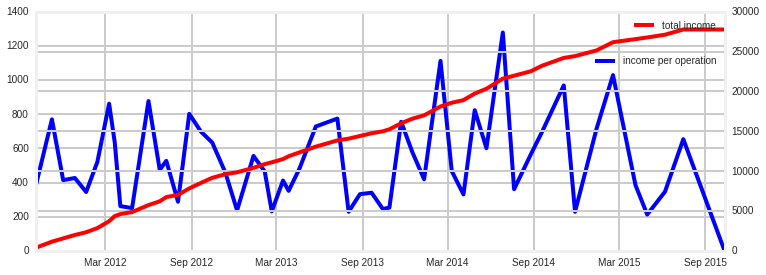

In [38]:
# Here is how I have earned 27K$ :-)

fig, ax1 = plt.subplots()

ax1.plot(map(lambda x: x[0],my_earning),map(lambda x: x[1],my_earning),color="b",label="\n\n\nincome per operation\n\n\n")
legend()
ax2 = ax1.twinx()
ax2.plot(map(lambda x: x[0],my_earning),np.cumsum(map(lambda x: x[1],my_earning)),color="r",label="total income")
legend()

In [51]:
log_of_operations[-2][['Date', u'Account_Equity', u'Profit', u'Margin', u'Margin_Cost']]

,Date,Account_Equity,Profit,Margin,Margin_Cost
0,2015-06-09,1000.000000,0.000000,2661.606658,0.212929
1,2015-06-10,1038.460083,38.460083,2875.326661,0.442955
2,2015-06-11,1038.460083,-8.420152,2875.326661,0.442955
3,2015-06-12,1030.039931,-31.869972,2875.326661,0.442955
4,2015-06-15,998.169959,-10.780000,2875.326661,0.442955
5,2015-06-16,1002.749968,15.360009,2636.066664,0.653840
6,2015-06-17,1002.749968,-4.499908,2636.066664,0.653840
7,2015-06-18,1015.530002,17.279942,2876.386664,0.883951
8,2015-06-19,1015.530002,-33.810027,2876.386664,0.883951
9,2015-06-22,1012.806090,0.000000,3584.681653,0.286775


In [50]:
filter(lambda x: "instrument_"in x,log_of_operations[-1].columns)
log_of_operations[-2][["Date"]+filter(lambda x: "instrument_"in x,log_of_operations[-1].columns)]

,Date,instrument_XOM,instrument_AAPL,instrument_MSFT,instrument_JNJ,instrument_GE,instrument_CVX,instrument_PG,instrument_WFC
0,2015-06-09,0,18,0,0,27,0,0,8
1,2015-06-10,0,19,0,0,28,0,0,9
2,2015-06-11,0,19,0,0,28,0,0,9
3,2015-06-12,0,19,0,0,28,0,0,9
4,2015-06-15,0,19,0,0,28,0,0,9
5,2015-06-16,0,18,0,0,26,0,0,8
6,2015-06-17,0,18,0,0,26,0,0,8
7,2015-06-18,0,19,0,0,28,0,0,9
8,2015-06-19,0,19,0,0,28,0,0,9
9,2015-06-22,0,22,0,0,27,0,0,15


In [32]:
### Do not delete the following Markdown section! 
### This is the BibTeX references!

<!--bibtex

@Article{BlLitterman,
  Author    = {Ondrej Martinsky,},
  Title     = {Portfolio Optimization II : Black-Litterman model}, 
  year      = 2013,
  url       = "http://www.quantandfinancial.com/search/label/Black-Litterman",  
}



-->

#References

<a name="cite-BlLitterman"/><sup>[^](#ref-1) </sup>Ondrej Martinsky,. 2013. _Portfolio Optimization II : Black-Litterman model_. [URL](http://www.quantandfinancial.com/search/label/Black-Litterman)

